In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [ ]:
data = pd.read_csv('data_pelanggan.csv')
df= pd.DataFrame(data)
print(df.head())
print(df.info())

   lama_berlangganan  total_belanja_juta  churn
0                  1                   2      1
1                 12                  10      0
2                 24                  25      0
3                  3                   4      1
4                  5                   3      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   lama_berlangganan   10 non-null     int64
 1   total_belanja_juta  10 non-null     int64
 2   churn               10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes
None


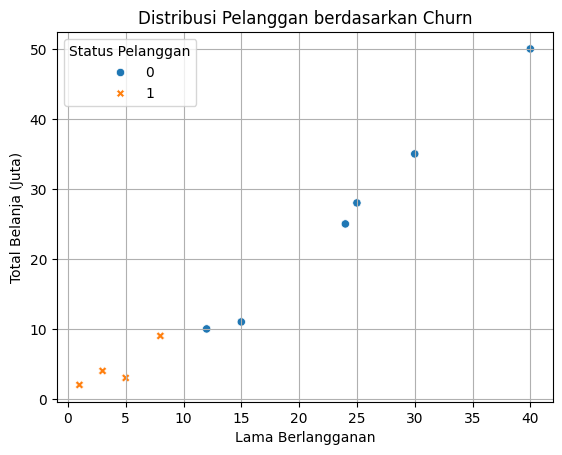

In [ ]:
sns.scatterplot(data=df, x='lama_berlangganan', y='total_belanja_juta', hue='churn', style='churn')
plt.title('Distribusi Pelanggan berdasarkan Churn')
plt.xlabel('Lama Berlangganan' )
plt.ylabel('Total Belanja (Juta)')
plt.grid(True)
plt.legend(title='Status Pelanggan')
plt.show()

sns.pairplot(df, hue='species')
plt.show()

In [ ]:
x = df.drop('churn', axis=1)
y = df['churn']
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42, stratify=y)
print("Jumlah data train {}".format(len(x_train)))
print("Jumlah data test {}".format(len(x_test)))

Jumlah data train 7
Jumlah data test 3


In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)
y_pred=model.predict(x_test_scaled) 
print(f"akurasi = {accuracy_score(y_test, y_pred)}")
print(f"prediksi model = {y_pred}")
print(f"data real = {y_test.values}")

akurasi = 1.0
prediksi model = [0 0 1]
data real = [0 0 1]


In [ ]:
data_baru = pd.DataFrame({
    'lama_berlangganan': [2,30],
    'total_belanja_juta' :[20, 33]
})

data_baru_scaled =scaler.transform(data_baru)
print(f"data baru setelah di scaled")
print(data_baru_scaled)

pred_baru = model.predict(data_baru_scaled)
print(f"prediksi data baru = {pred_baru}")

# for pred_all in pred_baru:
#     hasil = 'churn' if pred_all==1 else 'stay'
#     print(f"hasil prediksi data baru = {hasil}")

# print(df.describe())  

data baru setelah di scaled
[[-1.182466    0.0345599 ]
 [ 0.96349082  0.82079752]]
prediksi data baru = [1 0]
